In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

Symbol of the company: ibm
Company Name: International Business Machines Corp
Company Symbol: IBM
How many days to be analysed? 
30
The highest price is $139.54 on 2023-07-24
The lowest price is $129.43 on 2023-06-23
The current Price: $139.54
IBM stock price: ▲0.43% 


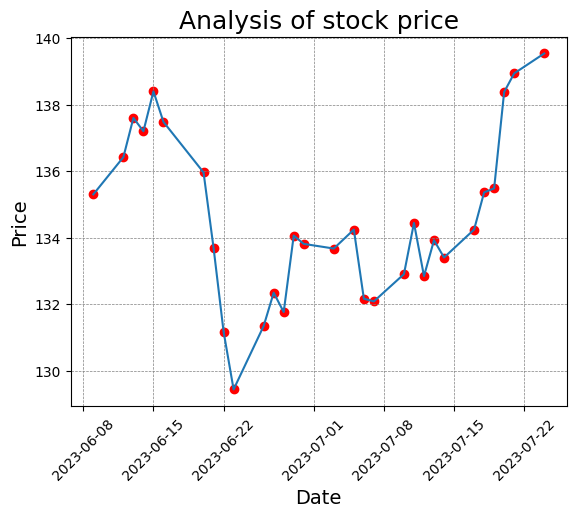

In [3]:
api_key = 'YOUR API KEY'
symbol = input("Symbol of the company: ").upper()

try:
    # api for stock price
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}'

except requests.exceptions.RequestException as e:
    print("Error occured. Try again.")
    symbol = input("Symbol of the company: ").upper()
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}'


base_url = "https://www.alphavantage.co/query"
params = {
    "function": "SYMBOL_SEARCH",
    "keywords": symbol,
    "apikey": api_key
}

symbol_response = requests.get(base_url, params=params)
symbol_data = symbol_response.json()
matches = symbol_data.get("bestMatches", [])
company_symbol = matches[0]['1. symbol']
company_name = matches[0]["2. name"]

print(f"Company Name: {company_name}")
print(f"Company Symbol: {company_symbol}")

r = requests.get(url)
data = r.json()

data_list = list(data['Time Series (Daily)'])
data = data['Time Series (Daily)']


def numbers(number):
    try:
        num_value = int(number)
    except ValueError or TypeError:
        print("Please give corrct value.")
        nums = input("How many days to be analysed? \n")
        numbers(nums)
    else:
        for n in range(num_value):
            selected_item = data_list[n]
            close_price = data[selected_item]['4. close']
            close_price = float(close_price)
            price_list.append(close_price)


num = input("How many days to be analysed? \n")
price_list = []
numbers(num)


high = 0
low = 1000000
for x in price_list:
    if x > high:
        high = x
    if x < low:
        low = x

high_index = price_list.index(high)
high_date = data_list[high_index]
low_index = price_list.index(low)
low_date = data_list[low_index]


print(f"The highest price is ${high} on {high_date}")
print(f"The lowest price is ${low} on {low_date}")


stock_price_1 = price_list[0]
stock_price_2 = price_list[1]

stock_difference = stock_price_1 - stock_price_2
stock_percentage = round((stock_difference / stock_price_1) * 100, 2)

print(f"The current Price: ${stock_price_1}")
if stock_percentage > 0:
    print(f'{symbol} stock price: ▲{stock_percentage}% ')
elif stock_percentage < 0:
    print(f'{symbol} stock price: ▼{stock_percentage}% ')
else:
    print('No change in stock price.')


df = pd.DataFrame()
df['Date'] = data_list[:len(price_list)]
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = price_list


plt.plot(df['Date'], df["Price"])
plt.scatter(df['Date'], df["Price"], color='red', marker='o', label='Points')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Analysis of stock price', fontsize=18)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major', axis='both')

plt.show()
# plt.savefig("chart.png")
